# Importing the required modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import spacy

# Reading the dataset

In [83]:
curr = pd.read_csv("../data/curriculum.csv")

# Glimpse into the dataset

In [84]:
curr.head()

,Courses,Topic,Duration,Effort,Total Hours Lower Bound,Start Date,End Date Estimate Lower Bound,Total Hours Upper Bound,Start Date.1,End Date Estimate Upper Bound,Actual End Date,Prerequisites
0,Python for Everybody,Intro CS,10 weeks,10 hours/week,100,28-07-2022,01-09-2022,100,28-07-2022,01-09-2022,NaN,-
1,Introduction to Computer Science and Programmi...,Intro CS,9 weeks,15 hours/week,135,01-09-2022,18-10-2022,135,01-09-2022,18-10-2022,NaN,high school algebra
2,How to Code - Simple Data,Core Programming,7 weeks,8-10 hours/week,56,18-10-2022,06-11-2022,70,18-10-2022,11-11-2022,NaN,-
3,How to Code - Complex Data,Core Programming,6 weeks,8-10 hours/week,48,06-11-2022,23-11-2022,60,11-11-2022,02-12-2022,NaN,How to Code - Simple Data
4,"Programming Languages, Part A",Core Programming,5 weeks,4-8 hours/week,20,23-11-2022,30-11-2022,40,02-12-2022,16-12-2022,NaN,How to Code (Hear instructor)


In [85]:
curr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Courses                        43 non-null     object 
 1   Topic                          43 non-null     object 
 2   Duration                       42 non-null     object 
 3   Effort                         42 non-null     object 
 4   Total Hours Lower Bound        43 non-null     int64  
 5   Start Date                     43 non-null     object 
 6   End Date Estimate Lower Bound  43 non-null     object 
 7   Total Hours Upper Bound        43 non-null     int64  
 8   Start Date.1                   43 non-null     object 
 9   End Date Estimate Upper Bound  43 non-null     object 
 10  Actual End Date                0 non-null      float64
 11  Prerequisites                  42 non-null     object 
dtypes: float64(1), int64(2), object(9)
memory usage: 4.2

# Alloting course codes to each course

In [5]:
def get_course_code(row):
    topic = row[1].title()
    topic = "".join(re.findall("[A-Z]",topic))
    courses_in_topic = list(curr[curr["Topic"] == row[1]]["Courses"])
    course_code = str(courses_in_topic.index(row[0]) + 1).rjust(3,"0")
    return topic + course_code

In [6]:
curr["Course Code"] = curr.apply(get_course_code,axis=1)

# Handling Course Pre-requisites

## Finding most relevant courses for prequisites using Cosine Similiarity

In [7]:
df = pd.DataFrame(columns=["Prerequisite"] + list(curr["Courses"]) + list(curr["Topic"]))

In [8]:
df

,Prerequisite,Python for Everybody,Introduction to Computer Science and Programming using Python,How to Code - Simple Data,How to Code - Complex Data,"Programming Languages, Part A","Programming Languages, Part B","Programming Languages, Part C",Object-Oriented Design,Design Patterns,...,Core Ethics,Core Ethics,Core Ethics,Advanced Programming,Advanced Programming,Advanced Programming,Advanced Programming,Advanced Programming,Advanced Programming,Final Project


In [9]:
nlp = spacy.load("en_core_web_sm")
for i in set(curr["Prerequisites"]): 
    if str(type(i)) != "<class 'float'>":
        for k in i.split(";"):
            prereq = nlp(i.strip())
            row = {"Prerequisite":k}
            if i in df["Prerequisite"]:
                continue
            for j in list(curr["Courses"]) + list(curr["Topic"]):
                course = nlp(j.strip())
                row[j] = prereq.similarity(course)
            df = df.append(row,ignore_index=True)

C:\Users\mitug\AppData\Local\Temp/ipykernel_1720/914963020.py:11: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  row[j] = prereq.similarity(course)


In [10]:
#df = df.set_index("Prerequisite")

In [11]:
df

,Prerequisite,Python for Everybody,Introduction to Computer Science and Programming using Python,How to Code - Simple Data,How to Code - Complex Data,"Programming Languages, Part A","Programming Languages, Part B","Programming Languages, Part C",Object-Oriented Design,Design Patterns,...,Core Ethics,Core Ethics,Core Ethics,Advanced Programming,Advanced Programming,Advanced Programming,Advanced Programming,Advanced Programming,Advanced Programming,Final Project
0,Java for Everybody,0.887163,0.527122,0.267216,0.272803,0.163338,0.119332,0.168569,0.135117,0.236908,...,0.253042,0.253042,0.253042,0.284305,0.284305,0.284305,0.284305,0.284305,0.284305,0.321096
1,C++ for Everybody,0.621831,0.449858,0.333551,0.352690,0.488279,0.438433,0.499209,0.144365,0.438784,...,0.431127,0.431127,0.431127,0.345829,0.345829,0.345829,0.345829,0.345829,0.345829,0.462576
2,Java for Everybody,0.621831,0.449858,0.333551,0.352690,0.488279,0.438433,0.499209,0.144365,0.438784,...,0.431127,0.431127,0.431127,0.345829,0.345829,0.345829,0.345829,0.345829,0.345829,0.462576
3,Linear Algebra,0.621831,0.449858,0.333551,0.352690,0.488279,0.438433,0.499209,0.144365,0.438784,...,0.431127,0.431127,0.431127,0.345829,0.345829,0.345829,0.345829,0.345829,0.345829,0.462576
4,Python for Everybody,1.000000,0.614067,0.284196,0.278327,0.222033,0.178415,0.236059,0.180903,0.287245,...,0.295037,0.295037,0.295037,0.320114,0.320114,0.320114,0.320114,0.320114,0.320114,0.373142
5,How to Code: Simple Data,0.347886,0.349117,0.747667,0.712122,0.480058,0.480928,0.519834,0.211499,0.517171,...,0.529959,0.529959,0.529959,0.410602,0.410602,0.410602,0.410602,0.410602,0.410602,0.510676
6,-,-0.016595,-0.165618,0.104927,0.105341,0.076003,0.024623,0.073966,0.159847,-0.026023,...,0.004199,0.004199,0.004199,-0.102842,-0.102842,-0.102842,-0.102842,-0.102842,-0.102842,-0.053804
7,From Nand to Tetris Part I,0.658241,0.709123,0.451229,0.459345,0.448134,0.400455,0.401590,0.132073,0.395237,...,0.477251,0.477251,0.477251,0.407808,0.407808,0.407808,0.407808,0.407808,0.407808,0.508955
8,high school algebra,0.369998,0.367067,0.441401,0.427629,0.333702,0.357487,0.348972,0.357612,0.490888,...,0.468916,0.468916,0.468916,0.584847,0.584847,0.584847,0.584847,0.584847,0.584847,0.549081
9,Mathematics for Computer Science,0.664016,0.763913,0.518698,0.558219,0.546759,0.544172,0.546839,0.353599,0.553546,...,0.588003,0.588003,0.588003,0.530212,0.530212,0.530212,0.530212,0.530212,0.530212,0.555373


In [12]:
def get_most_relevant_course(row):
    best_similarity = max(row[1:])
    cols = list(df.columns)
    i = list(row[1:]).index(best_similarity)
    #print(row[0],"\t",cols[i + 1],"\t",best_similarity)
    #print(row.index,"\n")
    if best_similarity > 0.74:
        return {"Pre":row[0],"Rel":cols[i + 1],"simi":best_similarity,"incorrect":None}
    else:
        return {"Pre":row[0],"Rel":None,"simi":best_similarity,"incorrect":cols[i+1]}

In [13]:
d = pd.DataFrame(columns=["Pre","Rel","simi","incorrect"])

In [14]:
for i in df.apply(get_most_relevant_course,axis=1):
    d = d.append(i, ignore_index=True)

In [15]:
d

,Pre,Rel,simi,incorrect
0,Java for Everybody,Python for Everybody,0.887163,None
1,C++ for Everybody,None,0.626999,Software Engineering: Introduction
2,Java for Everybody,None,0.626999,Software Engineering: Introduction
3,Linear Algebra,None,0.626999,Software Engineering: Introduction
4,Python for Everybody,Python for Everybody,1.000000,None
5,How to Code: Simple Data,How to Code - Simple Data,0.747667,None
6,-,None,0.228649,Computer Networking: a Top-Down Approach
7,From Nand to Tetris Part I,Build a Modern Computer from First Principles:...,0.829135,None
8,high school algebra,None,0.601529,Software Architecture
9,Mathematics for Computer Science,Mathematics for Computer Science,1.000000,None


## Adding Prerequisites to the catalog

In [16]:
def add_prereq(row):
    if row[1] == None and row[0] != "-":
        return {"Courses" : row[0].title(),"Topic":"Prerequisites"}
    return None

In [17]:
for i in d.apply(add_prereq,axis=1):
    if i != None:
        curr = curr.append(i,ignore_index=True)

In [18]:
curr = curr[["Courses","Topic","Duration","Effort"]]

In [19]:
curr.head()

,Courses,Topic,Duration,Effort
0,Python for Everybody,Intro CS,10 weeks,10 hours/week
1,Introduction to Computer Science and Programmi...,Intro CS,9 weeks,15 hours/week
2,How to Code - Simple Data,Core Programming,7 weeks,8-10 hours/week
3,How to Code - Complex Data,Core Programming,6 weeks,8-10 hours/week
4,"Programming Languages, Part A",Core Programming,5 weeks,4-8 hours/week


In [20]:
curr.to_csv("../data/curr.csv")

In [5]:
curr = pd.read_csv("../data/curr.csv")

In [6]:
curr = curr.drop(["Unnamed: 0"],axis=1)

In [63]:
curr["Course Code"] = curr.apply(get_course_code,axis=1)

NameError: name 'get_course_code' is not defined

In [65]:
curr

,Courses,Topic,Duration,Effort,Course Code
0,Python for Everybody,Intro CS,10 weeks,10 hours/week,IC001
1,Introduction to Computer Science and Programmi...,Intro CS,9 weeks,15 hours/week,IC002
2,How to Code - Simple Data,Core Programming,7 weeks,8-10 hours/week,CP001
3,How to Code - Complex Data,Core Programming,6 weeks,8-10 hours/week,CP002
4,"Programming Languages, Part A",Core Programming,5 weeks,4-8 hours/week,CP003
5,"Programming Languages, Part B",Core Programming,3 weeks,4-8 hours/week,CP004
6,"Programming Languages, Part C",Core Programming,3 weeks,4-8 hours/week,CP005
7,Object-Oriented Design,Core Programming,4 weeks,4 hours/week,CP006
8,Design Patterns,Core Programming,4 weeks,4 hours/week,CP007
9,Software Architecture,Core Programming,4 weeks,2-5 hours/week,CP008


In [66]:
def prereq2coursecodes(course : str):
    s = list(c[c["Courses"] == course]["Prerequisites"])
    if len(s) > 0 or s != ["-"]:
        return str(s[0]).split(";")
    return None

In [67]:
curr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Courses      51 non-null     object
 1   Topic        51 non-null     object
 2   Duration     50 non-null     object
 3   Effort       42 non-null     object
 4   Course Code  51 non-null     object
dtypes: object(5)
memory usage: 2.1+ KB


In [68]:
c = pd.read_csv("../data/curriculum.csv")

In [69]:
c

,Courses,Topic,Duration,Effort,Total Hours Lower Bound,Start Date,End Date Estimate Lower Bound,Total Hours Upper Bound,Start Date.1,End Date Estimate Upper Bound,Actual End Date,Prerequisites
0,Python for Everybody,Intro CS,10 weeks,10 hours/week,100,28-07-2022,01-09-2022,100,28-07-2022,01-09-2022,NaN,-
1,Introduction to Computer Science and Programmi...,Intro CS,9 weeks,15 hours/week,135,01-09-2022,18-10-2022,135,01-09-2022,18-10-2022,NaN,high school algebra
2,How to Code - Simple Data,Core Programming,7 weeks,8-10 hours/week,56,18-10-2022,06-11-2022,70,18-10-2022,11-11-2022,NaN,-
3,How to Code - Complex Data,Core Programming,6 weeks,8-10 hours/week,48,06-11-2022,23-11-2022,60,11-11-2022,02-12-2022,NaN,How to Code - Simple Data
4,"Programming Languages, Part A",Core Programming,5 weeks,4-8 hours/week,20,23-11-2022,30-11-2022,40,02-12-2022,16-12-2022,NaN,How to Code (Hear instructor)
5,"Programming Languages, Part B",Core Programming,3 weeks,4-8 hours/week,12,30-11-2022,04-12-2022,24,16-12-2022,25-12-2022,NaN,"Programming Languages, Part A"
6,"Programming Languages, Part C",Core Programming,3 weeks,4-8 hours/week,12,04-12-2022,09-12-2022,24,25-12-2022,02-01-2023,NaN,"Programming Languages, Part B"
7,Object-Oriented Design,Core Programming,4 weeks,4 hours/week,16,09-12-2022,14-12-2022,16,02-01-2023,08-01-2023,NaN,Java for Everybody
8,Design Patterns,Core Programming,4 weeks,4 hours/week,16,14-12-2022,20-12-2022,16,08-01-2023,13-01-2023,NaN,Object-Oriented Design
9,Software Architecture,Core Programming,4 weeks,2-5 hours/week,8,20-12-2022,23-12-2022,20,13-01-2023,20-01-2023,NaN,Design Patterns


In [70]:
curr

,Courses,Topic,Duration,Effort,Course Code
0,Python for Everybody,Intro CS,10 weeks,10 hours/week,IC001
1,Introduction to Computer Science and Programmi...,Intro CS,9 weeks,15 hours/week,IC002
2,How to Code - Simple Data,Core Programming,7 weeks,8-10 hours/week,CP001
3,How to Code - Complex Data,Core Programming,6 weeks,8-10 hours/week,CP002
4,"Programming Languages, Part A",Core Programming,5 weeks,4-8 hours/week,CP003
5,"Programming Languages, Part B",Core Programming,3 weeks,4-8 hours/week,CP004
6,"Programming Languages, Part C",Core Programming,3 weeks,4-8 hours/week,CP005
7,Object-Oriented Design,Core Programming,4 weeks,4 hours/week,CP006
8,Design Patterns,Core Programming,4 weeks,4 hours/week,CP007
9,Software Architecture,Core Programming,4 weeks,2-5 hours/week,CP008


In [31]:
curr.to_csv("../data/curr.csv")

In [69]:
course_codes = pd.read_csv("../data/curr.csv")

In [70]:
course_codes

,Unnamed: 0,Courses,Topic,Duration,Effort,Course Code
0,0,Python for Everybody,Intro CS,10 weeks,10 hours/week,IC001
1,1,Introduction to Computer Science and Programmi...,Intro CS,9 weeks,15 hours/week,IC002
2,2,How to Code - Simple Data,Core Programming,7 weeks,8-10 hours/week,CP001
3,3,How to Code - Complex Data,Core Programming,6 weeks,8-10 hours/week,CP002
4,4,"Programming Languages, Part A",Core Programming,5 weeks,4-8 hours/week,CP003
5,5,"Programming Languages, Part B",Core Programming,3 weeks,4-8 hours/week,CP004
6,6,"Programming Languages, Part C",Core Programming,3 weeks,4-8 hours/week,CP005
7,7,Object-Oriented Design,Core Programming,4 weeks,4 hours/week,CP006
8,8,Design Patterns,Core Programming,4 weeks,4 hours/week,CP007
9,9,Software Architecture,Core Programming,4 weeks,2-5 hours/week,CP008


In [71]:
curr

,Courses,Topic,Duration,Effort,Total Hours Lower Bound,Start Date,End Date Estimate Lower Bound,Total Hours Upper Bound,Start Date.1,End Date Estimate Upper Bound,Actual End Date,Prerequisites
0,Python for Everybody,Intro CS,10 weeks,10 hours/week,100,28-07-2022,01-09-2022,100,28-07-2022,01-09-2022,NaN,-
1,Introduction to Computer Science and Programmi...,Intro CS,9 weeks,15 hours/week,135,01-09-2022,18-10-2022,135,01-09-2022,18-10-2022,NaN,high school algebra
2,How to Code - Simple Data,Core Programming,7 weeks,8-10 hours/week,56,18-10-2022,06-11-2022,70,18-10-2022,11-11-2022,NaN,-
3,How to Code - Complex Data,Core Programming,6 weeks,8-10 hours/week,48,06-11-2022,23-11-2022,60,11-11-2022,02-12-2022,NaN,How to Code - Simple Data
4,"Programming Languages, Part A",Core Programming,5 weeks,4-8 hours/week,20,23-11-2022,30-11-2022,40,02-12-2022,16-12-2022,NaN,How to Code (Hear instructor)
5,"Programming Languages, Part B",Core Programming,3 weeks,4-8 hours/week,12,30-11-2022,04-12-2022,24,16-12-2022,25-12-2022,NaN,"Programming Languages, Part A"
6,"Programming Languages, Part C",Core Programming,3 weeks,4-8 hours/week,12,04-12-2022,09-12-2022,24,25-12-2022,02-01-2023,NaN,"Programming Languages, Part B"
7,Object-Oriented Design,Core Programming,4 weeks,4 hours/week,16,09-12-2022,14-12-2022,16,02-01-2023,08-01-2023,NaN,Java for Everybody
8,Design Patterns,Core Programming,4 weeks,4 hours/week,16,14-12-2022,20-12-2022,16,08-01-2023,13-01-2023,NaN,Object-Oriented Design
9,Software Architecture,Core Programming,4 weeks,2-5 hours/week,8,20-12-2022,23-12-2022,20,13-01-2023,20-01-2023,NaN,Design Patterns


In [18]:
curr = curr[["Courses","Prerequisites"]]

In [72]:
def capitalize(s : str):
    return s.upper().strip()

In [73]:
course_codes["Courses"] = course_codes["Courses"].map(capitalize)

In [74]:
def prereq2coursecode(preqs : str):
    if str(type(preqs)) != str(type(0.9)):
        preqs = preqs.split(";")
        a = []
        for i in preqs:
            a.append(course_codes[course_codes["Courses"] == i.upper().strip()]["Course Code"])
        a = np.array(a).flatten()
        return ";".join(a)

In [75]:
curr["Prerequisite Codes"] = curr["Prerequisites"].map(prereq2coursecode)

In [96]:
curr = pd.read_csv("../data/curriculum_with_prerequisites.csv")

In [97]:
curr

,Unnamed: 0,Courses,Topic,Duration,Effort,Total Hours Lower Bound,Start Date,End Date Estimate Lower Bound,Total Hours Upper Bound,Start Date.1,End Date Estimate Upper Bound,Actual End Date,Prerequisites,Prerequisite Codes,Course Code
0,0,Python for Everybody,Intro CS,10 weeks,10 hours/week,100,28-07-2022,01-09-2022,100,28-07-2022,01-09-2022,NaN,-,NaN,IC001
1,1,Introduction to Computer Science and Programmi...,Intro CS,9 weeks,15 hours/week,135,01-09-2022,18-10-2022,135,01-09-2022,18-10-2022,NaN,high school algebra,P004,IC002
2,2,How to Code - Simple Data,Core Programming,7 weeks,8-10 hours/week,56,18-10-2022,06-11-2022,70,18-10-2022,11-11-2022,NaN,-,NaN,CP001
3,3,How to Code - Complex Data,Core Programming,6 weeks,8-10 hours/week,48,06-11-2022,23-11-2022,60,11-11-2022,02-12-2022,NaN,How to Code - Simple Data,CP001,CP002
4,4,"Programming Languages, Part A",Core Programming,5 weeks,4-8 hours/week,20,23-11-2022,30-11-2022,40,02-12-2022,16-12-2022,NaN,How to Code (Hear instructor),P007,CP003
5,5,"Programming Languages, Part B",Core Programming,3 weeks,4-8 hours/week,12,30-11-2022,04-12-2022,24,16-12-2022,25-12-2022,NaN,"Programming Languages, Part A",CP003,CP004
6,6,"Programming Languages, Part C",Core Programming,3 weeks,4-8 hours/week,12,04-12-2022,09-12-2022,24,25-12-2022,02-01-2023,NaN,"Programming Languages, Part B",CP004,CP005
7,7,Object-Oriented Design,Core Programming,4 weeks,4 hours/week,16,09-12-2022,14-12-2022,16,02-01-2023,08-01-2023,NaN,Java for Everybody,P002,CP006
8,8,Design Patterns,Core Programming,4 weeks,4 hours/week,16,14-12-2022,20-12-2022,16,08-01-2023,13-01-2023,NaN,Object-Oriented Design,CP006,CP007
9,9,Software Architecture,Core Programming,4 weeks,2-5 hours/week,8,20-12-2022,23-12-2022,20,13-01-2023,20-01-2023,NaN,Design Patterns,CP007,CP008


In [77]:
curr.to_csv("../data/curriculum_with_prerequisites.csv")

In [98]:
y = curr[["Courses","Prerequisite Codes","Course Code"]]

In [100]:
y.to_csv("../data/edge_list.csv")

In [2]:
y = pd.read_csv("../data/edge_list.csv")

In [3]:
y = y.drop(["Unnamed: 0"],axis=1)

In [4]:
y

,Courses,Prerequisite Codes,Course Code
0,Python for Everybody,NaN,IC001
1,Introduction to Computer Science and Programmi...,P004,IC002
2,How to Code - Simple Data,NaN,CP001
3,How to Code - Complex Data,CP001,CP002
4,"Programming Languages, Part A",P007,CP003
5,"Programming Languages, Part B",CP003,CP004
6,"Programming Languages, Part C",CP004,CP005
7,Object-Oriented Design,P002,CP006
8,Design Patterns,CP006,CP007
9,Software Architecture,CP007,CP008


In [8]:
x = dict()

In [9]:
for i in y.index:
    print(y.iloc[i]["Course Code"],y.iloc[i]["Prerequisite Codes"])
    r = y.iloc[i]["Prerequisite Codes"]
    if type(r) != type(0.9):
       x[y.iloc[i]["Course Code"]] = r.split(";")
    else:
       x[y.iloc[i]["Course Code"]] = []

IC001 nan
IC002 P004
CP001 nan
CP002 CP001
CP003 P007
CP004 CP003
CP005 CP004
CP006 P002
CP007 CP006
CP008 CP007
CM001 P008
CM002 CM001
CM003 CM002
CM004 CM003
CT001 nan
CS001 P010
CS002 CS001
CS003 P010
CS004 P003;P005;P006
CT001 CM004
CT002 CT001
CT003 CT002
CT004 CT003
CS001 nan
CS002 nan
CS003 nan
CS004 nan
CA001 CP001;CP002;CP003;CP004;CP005;CP006;CP007;CP008
CA002 CP001;CP002;CP003;CP004;CP005;CP006;CP007;CP008
CA003 CP001;CP002;CP003;CP004;CP005;CP006;CP007;CP008
CA004 P003
CA005 P001;P002;P003
CA006 CP001;CP002;CP003;CP004;CP005;CP006;CP007;CP008
CE001 nan
CE002 nan
CE003 nan
AP001 P009
AP002 nan
AP003 nan
AP004 nan
AP005 IC001;CP006
AP006 IC001
FP001 nan
P001 nan
P002 nan
P003 nan
P004 nan
P005 nan
P006 nan
P007 nan
P008 nan
P009 nan
P010 nan


In [10]:
x

{'IC001': [],
 'IC002': ['P004'],
 'CP001': [],
 'CP002': ['CP001'],
 'CP003': ['P007'],
 'CP004': ['CP003'],
 'CP005': ['CP004'],
 'CP006': ['P002'],
 'CP007': ['CP006'],
 'CP008': ['CP007'],
 'CM001': ['P008'],
 'CM002': ['CM001'],
 'CM003': ['CM002'],
 'CM004': ['CM003'],
 'CT001': ['CM004'],
 'CS001': [],
 'CS002': [],
 'CS003': [],
 'CS004': [],
 'CT002': ['CT001'],
 'CT003': ['CT002'],
 'CT004': ['CT003'],
 'CA001': ['CP001',
  'CP002',
  'CP003',
  'CP004',
  'CP005',
  'CP006',
  'CP007',
  'CP008'],
 'CA002': ['CP001',
  'CP002',
  'CP003',
  'CP004',
  'CP005',
  'CP006',
  'CP007',
  'CP008'],
 'CA003': ['CP001',
  'CP002',
  'CP003',
  'CP004',
  'CP005',
  'CP006',
  'CP007',
  'CP008'],
 'CA004': ['P003'],
 'CA005': ['P001', 'P002', 'P003'],
 'CA006': ['CP001',
  'CP002',
  'CP003',
  'CP004',
  'CP005',
  'CP006',
  'CP007',
  'CP008'],
 'CE001': [],
 'CE002': [],
 'CE003': [],
 'AP001': ['P009'],
 'AP002': [],
 'AP003': [],
 'AP004': [],
 'AP005': ['IC001', 'CP006'],
 '

In [11]:
import networkx as nx
G = nx.Graph()

In [12]:
for i in x:
    for j in x[i]:
        G.add_edge(i,j)

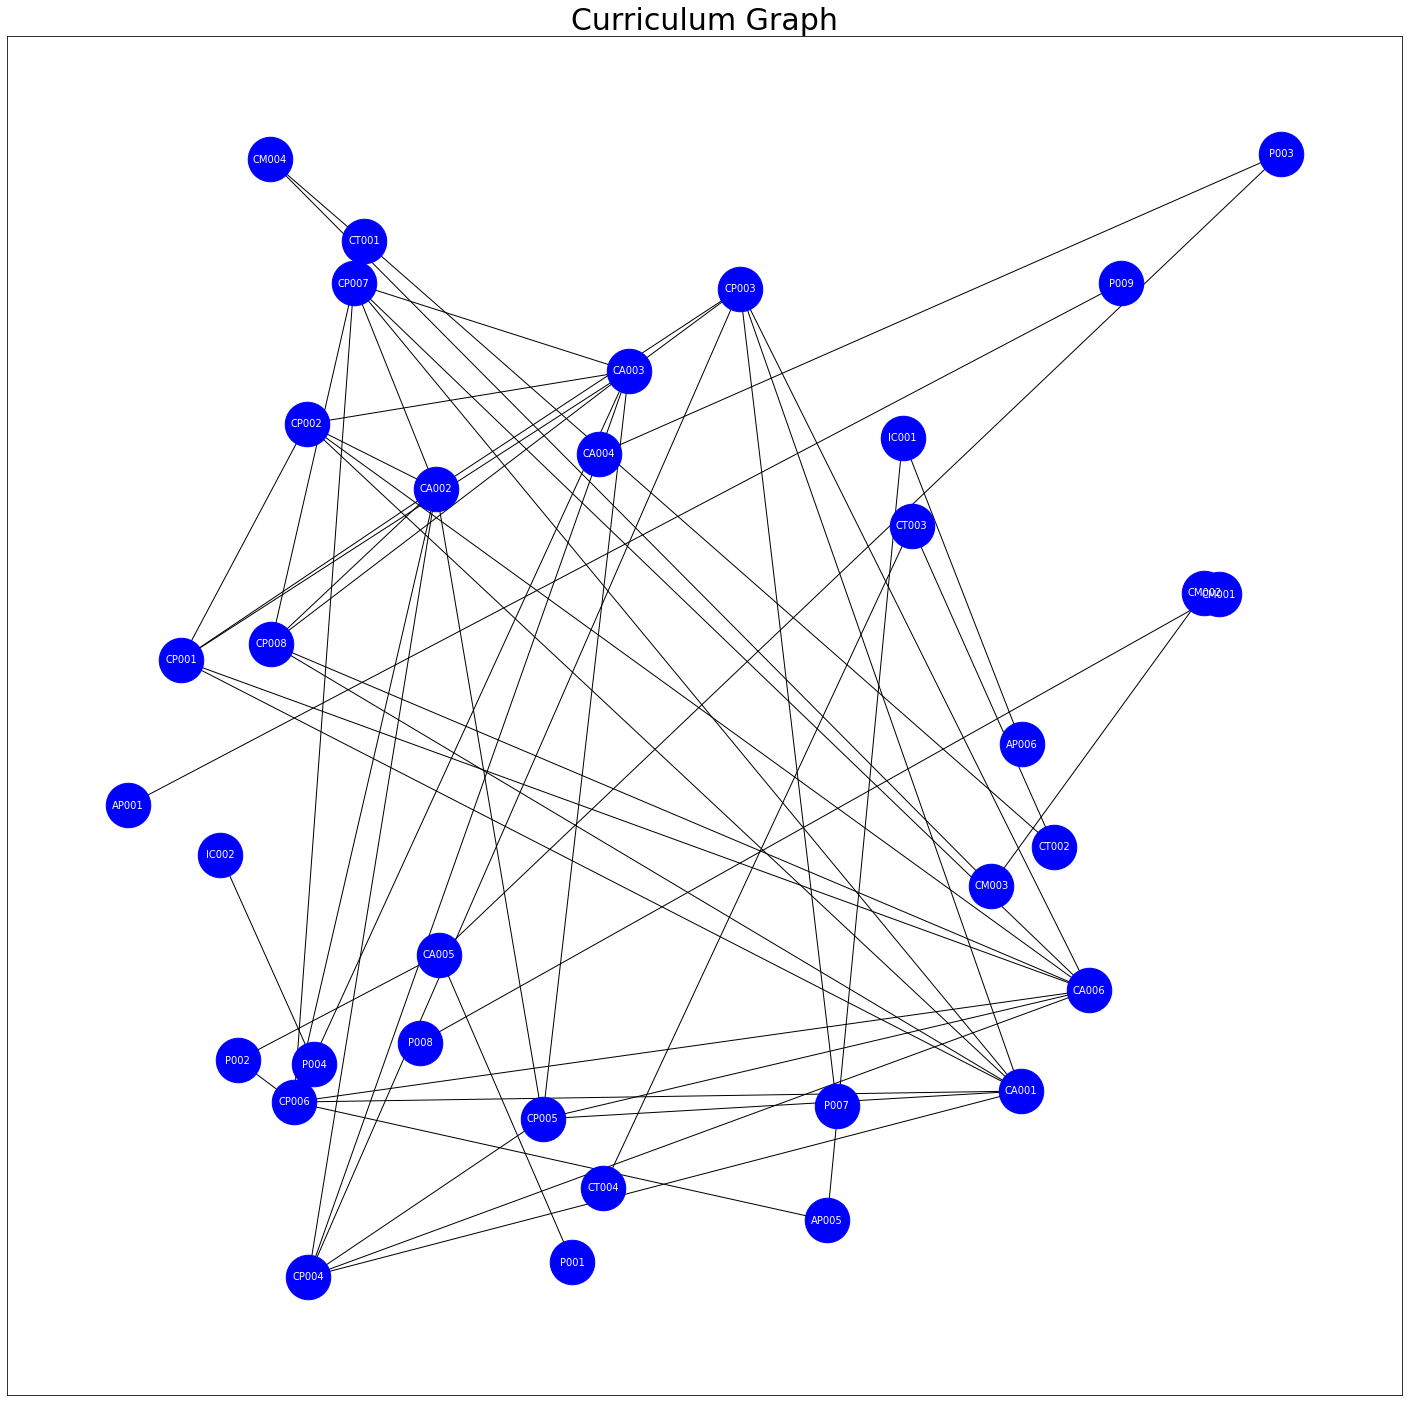

In [29]:
plt.figure(figsize=(25,25))
pos = nx.random_layout(G)
nx.draw_networkx_nodes(G, pos=pos, node_color="blue",node_size=1980)
nx.draw_networkx_edges(G, pos=pos)
nx.draw_networkx_labels(G, pos, font_size=10, font_color="white")
plt.title("Curriculum Graph",font={"size":30})
plt.show()